<a href="https://colab.research.google.com/github/Tamil-Ilakkiya1404/data_analysis_kovai.co/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error, mean_squared_error, classification_report

In [59]:
df=pd.read_csv('data.csv')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [61]:
print(df.head())

         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  Other
0  30/08/2024        16436       10705           225        19026    3925   59.0
1  15/09/2023        15499       10671           267        18421    4519   61.0
2  28/12/2021         1756        2352             0         3775       0   13.0
3  11/01/2023        10536        8347           223        14072       0   48.0
4  11/09/2021          820         612             0         1283       0   11.0


In [62]:
df.isnull().isna().sum()

,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,0


In [63]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [64]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

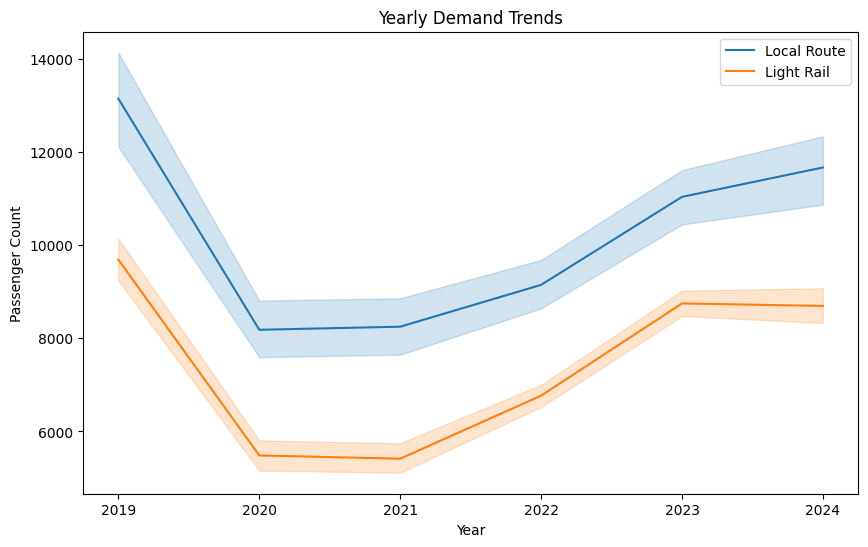

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Local Route', data=df, label='Local Route')
sns.lineplot(x='Year', y='Light Rail', data=df, label='Light Rail')
plt.title('Yearly Demand Trends')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.show()

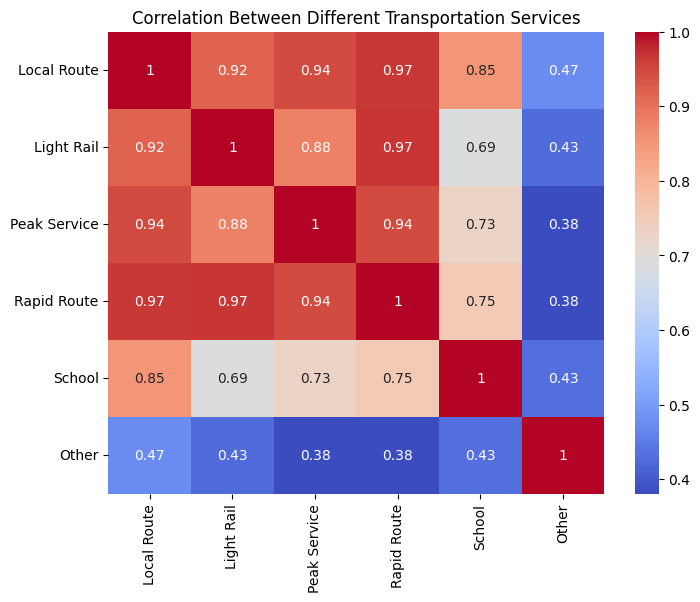

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Transportation Services')
plt.show()

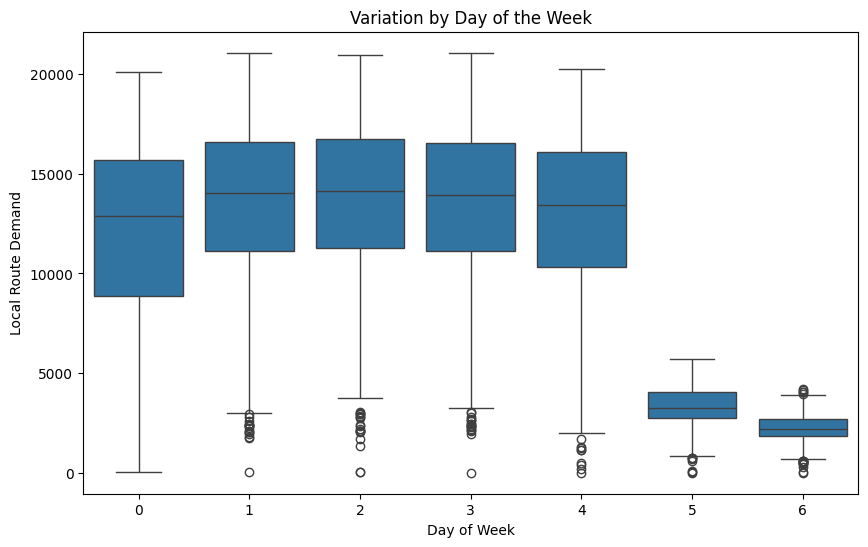

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Local Route', data=df)
plt.title('Variation by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Local Route Demand')
plt.show()

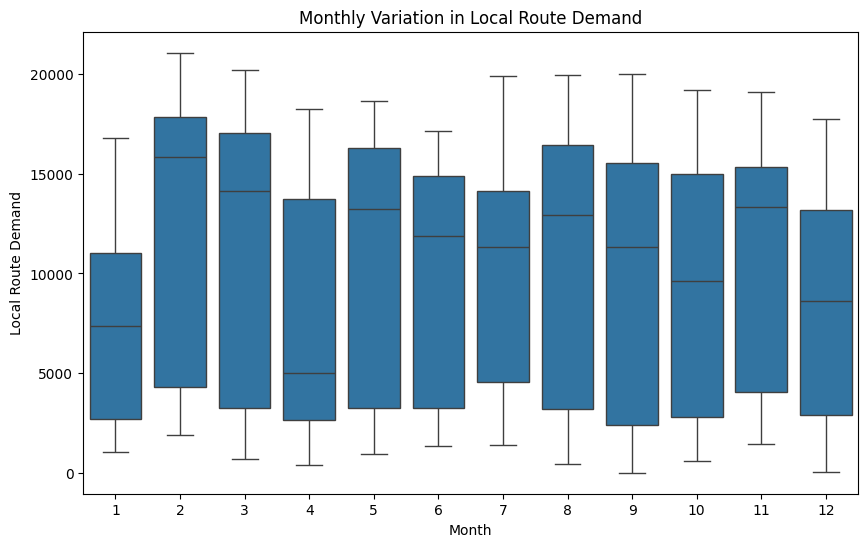

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Local Route', data=df)
plt.title('Monthly Variation in Local Route Demand')
plt.xlabel('Month')
plt.ylabel('Local Route Demand')
plt.show()

In [17]:
X = df.copy()
y = X.pop('Local Route')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.8, random_state=42)

In [19]:
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [42]:
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Squared Error: {mse}")

Root Mean Squared Error: 635.265949879897
Mean Squared Error: 403562.8270768078


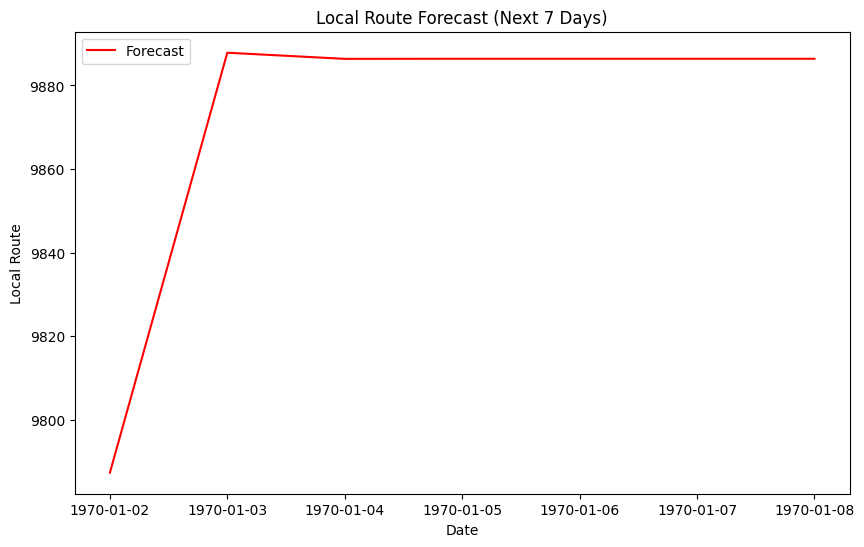

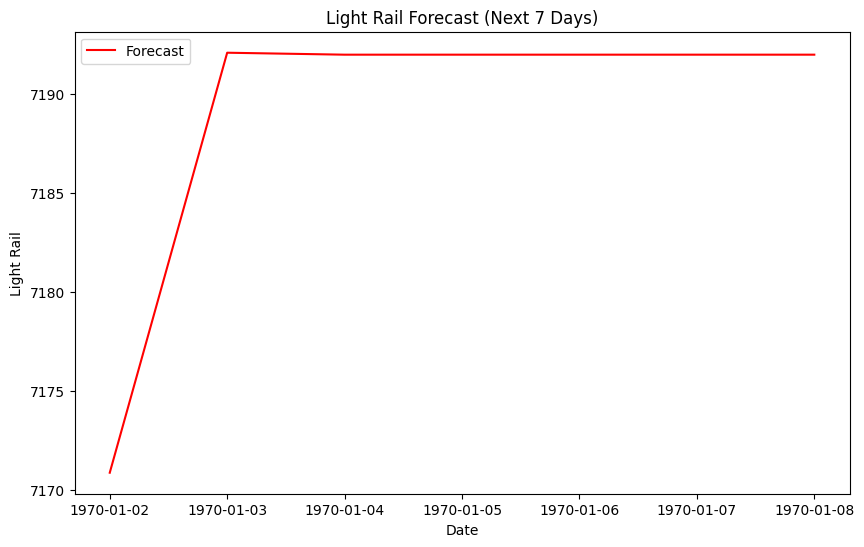

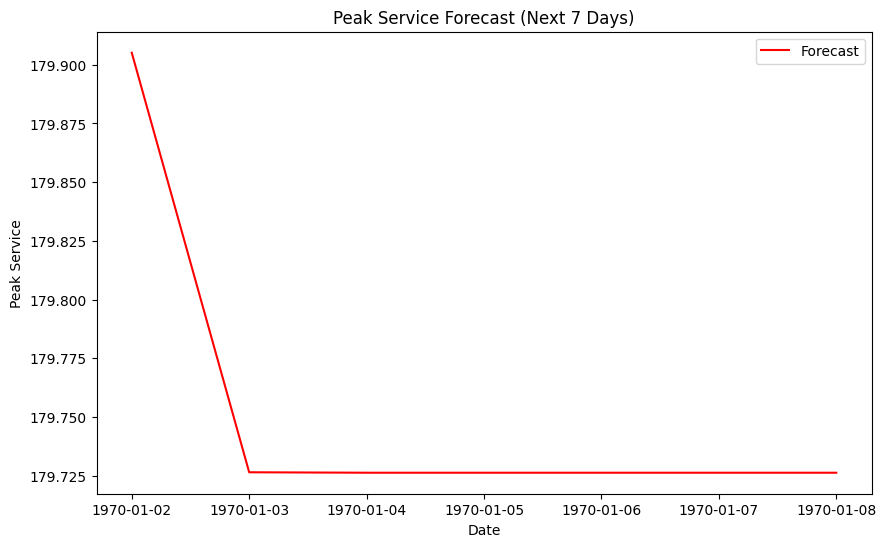

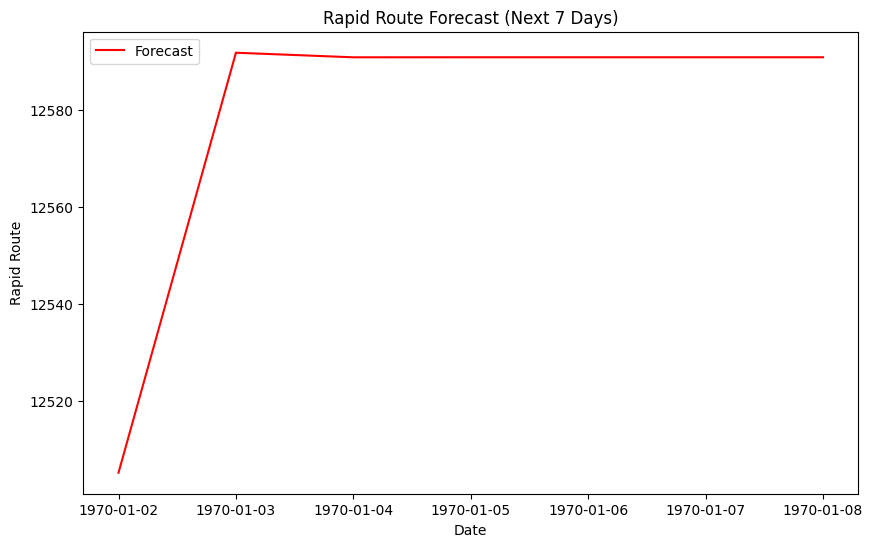

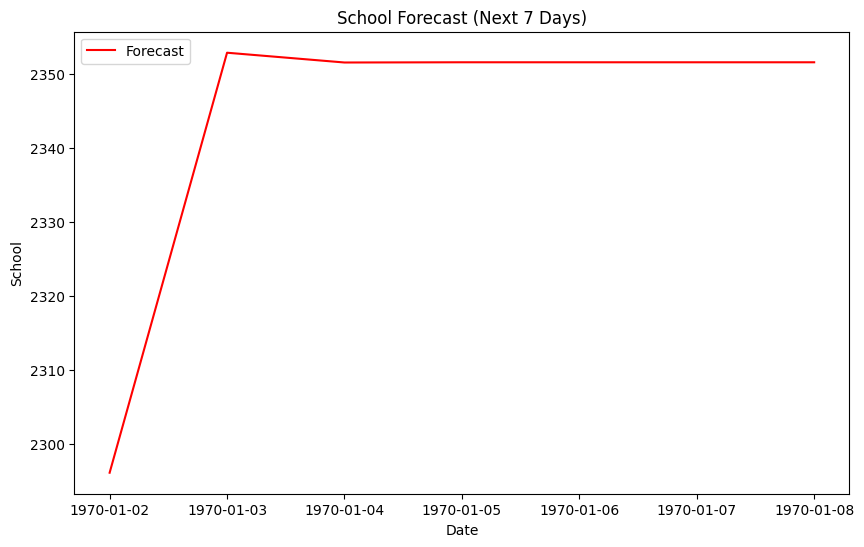

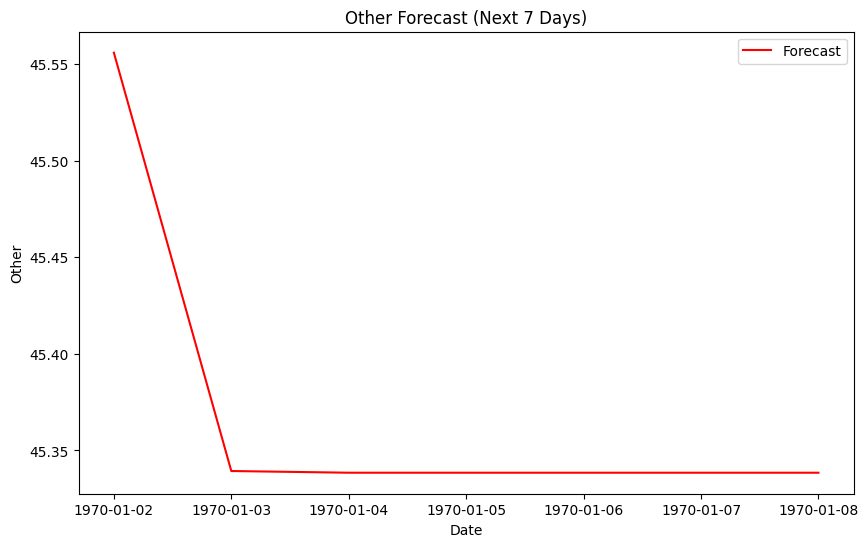

In [72]:
from statsmodels.tsa.arima.model import ARIMA
features = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
forecast_results = {}
for feature in features:
    # Select the feature column
    series = df[feature]
    model = ARIMA(series, order=(1, 1, 1))  # Adjust p, d, q as necessary
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=7)
    forecast_results[feature] = forecast

    plt.figure(figsize=(10, 6))
    #plt.plot(series, label='Historical Data')
    plt.plot(pd.date_range(start=series.index[-1], periods=7 + 1, freq='D')[1:], forecast, label='Forecast', color='red')
    plt.title(f"{feature} Forecast (Next 7 Days)")
    plt.xlabel("Date")
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [73]:
for feature, forecast in forecast_results.items():
    print(f"Forecast for {feature} for next 7 days: {forecast}")

Forecast for Local Route for next 7 days: 1918    9787.307118
1919    9887.840634
1920    9886.374301
1921    9886.395688
1922    9886.395376
1923    9886.395380
1924    9886.395380
Name: predicted_mean, dtype: float64
Forecast for Light Rail for next 7 days: 1918    7170.863317
1919    7192.107058
1920    7192.007984
1921    7192.008446
1922    7192.008444
1923    7192.008444
1924    7192.008444
Name: predicted_mean, dtype: float64
Forecast for Peak Service for next 7 days: 1918    179.905130
1919    179.726445
1920    179.726254
1921    179.726254
1922    179.726254
1923    179.726254
1924    179.726254
Name: predicted_mean, dtype: float64
Forecast for Rapid Route for next 7 days: 1918    12505.125387
1919    12591.751753
1920    12590.805800
1921    12590.816129
1922    12590.816017
1923    12590.816018
1924    12590.816018
Name: predicted_mean, dtype: float64
Forecast for School for next 7 days: 1918    2296.079308
1919    2352.925076
1920    2351.601756
1921    2351.632562
1922   